In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:

# Load CSVs
sales = pd.read_csv("sales data-set.csv", parse_dates=["Date"])
stores = pd.read_csv("stores data-set.csv")
features = pd.read_csv("Features data set.csv", parse_dates=["Date"])

print("Sales shape:", sales.shape)
print("Stores shape:", stores.shape)
print("Features shape:", features.shape)

sales.head()


Sales shape: (421570, 5)
Stores shape: (45, 3)
Features shape: (8190, 12)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:

# Merge sales + stores
sales_stores = pd.merge(sales, stores, on="Store", how="left")

# Merge with features
df = pd.merge(sales_stores, features, on=["Store", "Date"], how="left")

print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


/tmp/ipython-input-1419557995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="viridis")


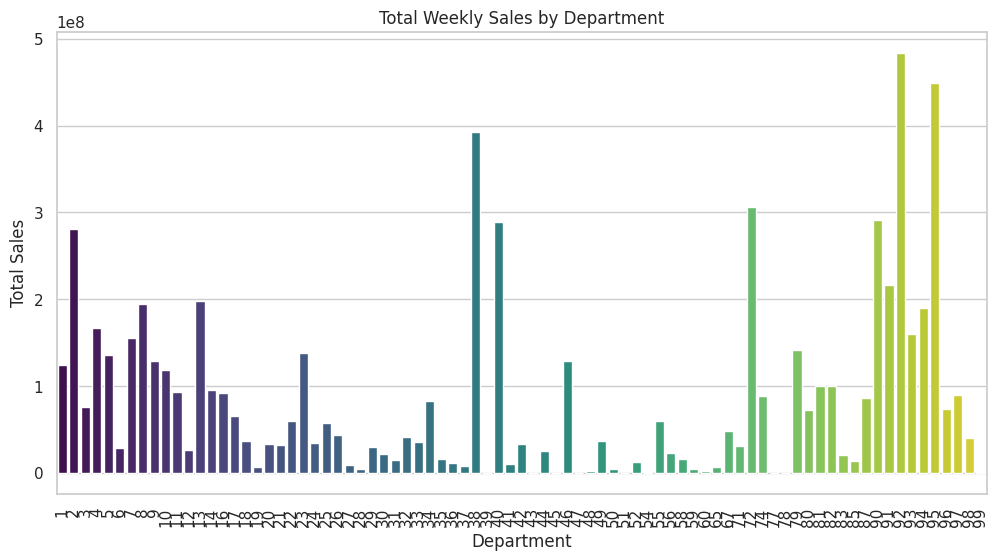

In [ ]:

# Total Weekly Sales by Department
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Weekly Sales by Department")
plt.ylabel("Total Sales")
plt.xlabel("Department")
plt.show()


/tmp/ipython-input-1272730288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_type_sales.index, y=store_type_sales.values, palette="magma")


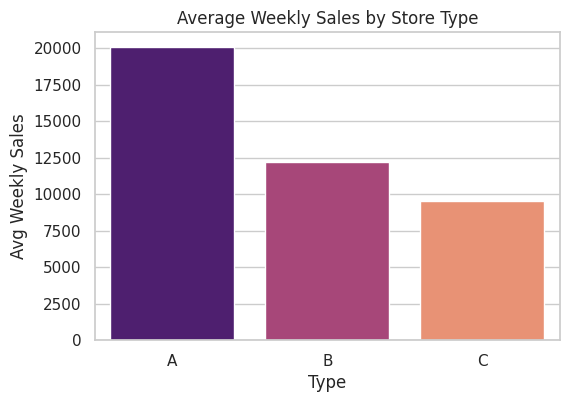

In [ ]:

# Average Weekly Sales by Store Type
store_type_sales = df.groupby("Type")["Weekly_Sales"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values, palette="magma")
plt.title("Average Weekly Sales by Store Type")
plt.ylabel("Avg Weekly Sales")
plt.show()


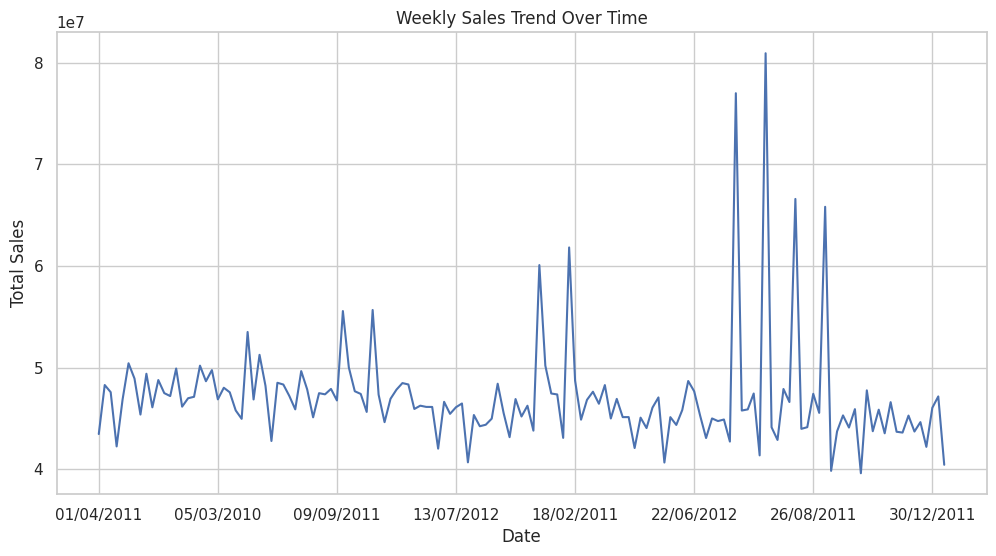

In [ ]:

# Trend of Weekly Sales over Time
df.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(12,6))
plt.title("Weekly Sales Trend Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()


In [ ]:

# Store performance ranking
store_perf = df.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False)
store_perf.head(10)


,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


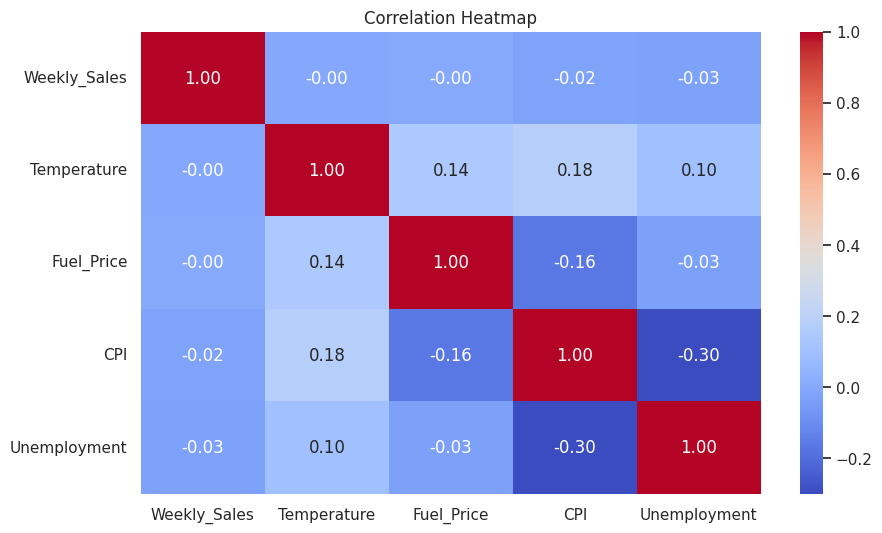

In [ ]:

# Correlation heatmap of features
plt.figure(figsize=(10,6))
sns.heatmap(df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Feature Engineering
X = df[["Store", "Dept", "Size", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].fillna(0)
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr))

Linear Regression R2: 0.08675910622101712
Linear Regression RMSE: 476228635.6154985


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2: 0.933176317687505
Random Forest RMSE: 34846611.96324472


In [ ]:

# Save merged dataset
df.to_csv("retail_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as retail_cleaned.csv")


✅ Cleaned dataset saved as retail_cleaned.csv
